# Analysis of Historical Windspeeds in Ireland

## Table of Contents
1. [Introduction](#introduction)
2. [Loading and Inspecting the Data sets](#loading-and-inspecting-the-data-sets)
    - [Roches Point (South)](#roches-point-south)
    - [Belmullet (West)](#belmullet-west)
    - [Malin (North)](#malin-north)
    - [Dublin (East)](#dublin-east)
    - [Mullingar (the Midlands)](#mullingar-the-midlands)
3. [Combined Dataframe](#combined-dataframe)
    - [Variables](#variables)
    - [Changing the Data Types](#changing-the-data-types)
4. [Plotting Dataframe](#plotting-dataframe)
    - [Yearly Windspeed Trends Across Each Station](#yearly-windspeed-trends-across-each-station)
    - [Seasonal Trends Over Time (by Station)](#seasonal-trends-over-time-by-station)
    - [Measuring The Proportion of Windspeeds That Fall Into The Operating Range](#measuring-the-proportion-of-windspeeds-that-fall-into-the-operating-range)
5. [Predicting Future Wind Speeds](#predicting-future-wind-speeds)
6. [References](#references)

## Introduction

The objective of this analysis is to gain insights into the windspeeds at various stations across the country and other variables that may affect the operation of wind turbines. 

I chose 5 dataframes to represent regions North, South, East, West and the Midlands. These being: Malin head, Roches Point, Dublin airport, Belmullet and Mullingar, respectively.

The aim is for the analysis to be as comprehensive as possible whilst retaining manageability.

I downloaded data in the command line using ``wget -O`` from [data.gov.ie](https://data.gov.ie/organization/meteireann?q=wind&sort=score+desc%2C+metadata_modified+desc)
 

In [797]:
# import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

## Loading and Inspecting the Data sets

Before I begin I will need to review each data set as there are sometimes different columns and different start dates for each. I will also need to inspect for missing values and clean up the data before creating my analysis.

#### Roches Point (South)

In [798]:
filepath1 = r"C:\Users\joann\Desktop\PFDA-project\dataframes\roches_point.csv"
df_south = pd.read_csv(filepath1, skiprows= 24)
df_south.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
0,01-dec-1955,0,10.9,0,5.9,,,0,9.1,1004.2,...,170,0,24,,,,,,,
1,02-dec-1955,0,12.1,0,4.0,,,0,0.9,1011.2,...,210,0,32,,,,,,,
2,03-dec-1955,0,10.7,0,6.4,,,3,0.0,1018.2,...,270,0,21,,,,,,,
3,04-dec-1955,0,11.6,0,4.8,,,0,1.5,1026.6,...,210,0,23,,,,,,,
4,05-dec-1955,0,11.8,0,10.7,,,0,0.8,1023.2,...,220,0,32,,,,,,,


In [799]:
df_south.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
21431,26-nov-2024,0,7.5,0,2.3,0,-1.0,0,0.4,1006.9,...,40,0,15,4.643,0.3,0.3,0.4,0.4,-8.6,332
21432,27-nov-2024,0,10.0,0,3.7,0,0.4,0,0.0,1011.5,...,120,0,22,4.903,0.5,0.6,1.0,1.0,-7.6,430
21433,28-nov-2024,0,12.6,0,9.6,0,1.4,0,4.2,1013.8,...,120,0,37,8.309,1.2,1.6,0.0,-2.1,-10.0,51
21434,29-nov-2024,0,13.0,0,12.3,0,8.2,0,10.0,1008.6,...,140,0,37,11.043,0.4,0.7,0.0,-9.6,-10.0,93
21435,30-nov-2024,0,13.2,0,12.1,0,11.7,0,7.4,1006.9,...,160,0,38,11.818,0.3,0.5,0.0,-7.1,-10.0,114


#### Drop Unnecessary Columns
[Very Helpful Website](https://www.statology.org/pandas-drop-columns-not-in-list/)

In [800]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_south = df_south[df_south.columns.intersection(keep_cols)]
df_new_south.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,01-dec-1955,10.9,5.9,9.1,1004.2,11.5,18,170,24
1,02-dec-1955,12.1,4.0,0.9,1011.2,12.1,23,210,32
2,03-dec-1955,10.7,6.4,0.0,1018.2,8.0,16,270,21
3,04-dec-1955,11.6,4.8,1.5,1026.6,6.3,16,210,23
4,05-dec-1955,11.8,10.7,0.8,1023.2,16.5,23,220,32


In [801]:
df_new_south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    21436 non-null  object
 1   maxtp   21436 non-null  object
 2   mintp   21436 non-null  object
 3   rain    21436 non-null  object
 4   cbl     21436 non-null  object
 5   wdsp    21436 non-null  object
 6   hm      21436 non-null  object
 7   ddhm    21436 non-null  object
 8   hg      21436 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [802]:
df_new_south.describe()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
count,21436,21436,21436,21436,21436,21436,21436,21436,21436
unique,21436,268,227,370,707,339,61,42,85
top,01-dec-1955,11.2,7.4,0.0,1014.8,11.0,16,,23
freq,1,244,227,8979,120,210,1120,2539,795


In [803]:
# Count of missing values in each column
print(df_new_south.isnull().sum())  

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column
Adding an extra column so that once the data frames are concatenated they can be identified seperately.

In [804]:
df_new_south.loc[:, "Station"] = 'South'

C:\Users\joann\AppData\Local\Temp\ipykernel_14376\1923057755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_south.loc[:, "Station"] = 'South'


#### Belmullet (West)

In [805]:
filepath2 = r"C:\Users\joann\Desktop\PFDA-project\dataframes\belmullet_mayo.csv"
df_west = pd.read_csv(filepath2, skiprows= 24)
df_west.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,17-sep-1956,0,16.6,0,8.6,0,7.2,2,0.0,1022.6,...,0,18,,,12.725,1.3,1.9,,,
1,18-sep-1956,0,17.5,0,11.6,0,11.0,2,0.0,1017.9,...,0,14,,,14.650,1.4,1.9,,,
2,19-sep-1956,0,17.0,0,12.7,0,11.8,0,0.0,1012.9,...,0,26,,,14.600,1.1,1.6,,,
3,20-sep-1956,0,19.2,0,13.4,0,12.6,0,1.0,1005.5,...,0,38,,,14.975,1.8,2.5,,,
4,21-sep-1956,0,17.4,0,12.3,0,11.7,0,0.6,998.7,...,0,36,,,14.650,1.6,2.3,,,


In [806]:
df_west.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
24907,26-nov-2024,0,7.9,0,0.2,0,-0.3,0,1.3,1009.7,...,0,15,1.9,224,5.627,0.2,0.3,0.0,-1.1,-10.0
24908,27-nov-2024,0,8.7,0,-1.6,0,-4.8,0,0.0,1016.7,...,0,13,4.5,352,3.646,0.0,0.1,0.0,0.0,-9.5
24909,28-nov-2024,0,12.7,0,2.1,0,-3.0,0,7.4,1014.3,...,0,35,0.0,40,5.120,0.6,0.8,0.0,-6.8,-10.0
24910,29-nov-2024,0,12.7,0,9.8,0,5.5,0,8.8,1006.8,...,0,26,0.0,32,8.690,0.6,0.8,0.0,-8.2,-10.0
24911,30-nov-2024,0,13.8,0,11.3,0,9.9,0,2.2,1003.6,...,0,46,0.1,96,9.898,0.8,1.0,0.0,-1.4,-10.0


#### Drop Unnecessary Columns

In [807]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_west = df_west[df_west.columns.intersection(keep_cols)]
df_new_west.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,17-sep-1956,16.6,8.6,0.0,1022.6,7.4,13,100,18
1,18-sep-1956,17.5,11.6,0.0,1017.9,8.0,13,170,14
2,19-sep-1956,17.0,12.7,0.0,1012.9,11.4,18,150,26
3,20-sep-1956,19.2,13.4,1.0,1005.5,17.5,27,210,38
4,21-sep-1956,17.4,12.3,0.6,998.7,17.4,27,170,36


In [808]:
df_new_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24912 entries, 0 to 24911
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24912 non-null  object 
 1   maxtp   24912 non-null  float64
 2   mintp   24912 non-null  float64
 3   rain    24912 non-null  float64
 4   cbl     24912 non-null  object 
 5   wdsp    24912 non-null  float64
 6   hm      24912 non-null  object 
 7   ddhm    24912 non-null  object 
 8   hg      24912 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ MB


In [809]:
df_new_west.describe()

,maxtp,mintp,rain,wdsp
count,24912.000000,24912.000000,24912.000000,24912.000000
mean,12.931214,7.254813,3.288929,12.695087
std,3.935487,3.988386,4.922051,5.751210
min,-1.100000,-8.100000,0.000000,0.000000
25%,10.100000,4.400000,0.000000,8.400000
50%,12.700000,7.500000,1.300000,12.000000
75%,15.900000,10.400000,4.600000,16.300000
max,29.900000,19.300000,67.800000,44.700000


In [810]:
print(df_new_west.isnull().sum())  

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [811]:
df_new_west.loc[:,'Station'] = 'West'

C:\Users\joann\AppData\Local\Temp\ipykernel_14376\1980096657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_west.loc[:,'Station'] = 'West'


#### Malin (North)

In [812]:
filepath3= r"C:\Users\joann\Desktop\PFDA-project\dataframes\malin.csv"
df_north = pd.read_csv(filepath3, skiprows= 24)
df_north.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-may-1955,0,9.4,0,6.9,0,3.8,0,7.4,996.2,...,2,48,,,,1.0,1.9,,,
1,02-may-1955,0,11.2,0,5.7,0,5.9,3,0.0,997.1,...,0,31,,,12.300,1.9,3.6,,,
2,03-may-1955,0,13.1,0,4.3,0,0.6,0,6.6,989.6,...,0,48,,,9.200,1.4,2.4,,,
3,04-may-1955,0,12.8,0,7.8,0,6.1,0,4.4,978.3,...,0,41,,,9.625,2.0,3.6,,,
4,05-may-1955,0,13.2,0,8.1,0,6.6,0,2.7,990.3,...,0,34,,,10.775,2.0,3.4,,,


In [813]:
df_north.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
25412,26-nov-2024,0,8.2,0,2.9,0,2.7,0,6.2,1006.7,...,0,29,1.2,199,6.132,0.4,0.4,0.0,-5.8,-10.0
25413,27-nov-2024,0,6.5,0,1.4,0,-1.0,0,1.0,1016.5,...,0,14,1.0,209,4.949,0.2,0.2,0.0,-0.8,-10.0
25414,28-nov-2024,0,12.1,0,1.9,0,-1.3,0,2.2,1015.9,...,0,45,0.0,85,4.588,0.8,1.1,0.0,-1.4,-10.0
25415,29-nov-2024,0,13.9,0,11.8,0,2.2,0,0.7,1008.2,...,0,38,0.0,30,9.148,1.0,1.4,0.3,0.3,-9.2
25416,30-nov-2024,0,15.4,0,11.5,0,9.1,0,0.1,1003.8,...,0,40,0.6,153,10.047,1.1,1.3,1.3,1.3,-7.7


#### Drop Unneccesary Columns

In [814]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_north = df_north[df_north.columns.intersection(keep_cols)]
df_new_north.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,01-may-1955,9.4,6.9,7.4,996.2,19.2,34,70,48
1,02-may-1955,11.2,5.7,0.0,997.1,14.2,24,310,31
2,03-may-1955,13.1,4.3,6.6,989.6,14.8,30,130,48
3,04-may-1955,12.8,7.8,4.4,978.3,19.9,27,230,41
4,05-may-1955,13.2,8.1,2.7,990.3,16.0,24,240,34


In [815]:
df_new_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25417 entries, 0 to 25416
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    25417 non-null  object 
 1   maxtp   25417 non-null  float64
 2   mintp   25417 non-null  float64
 3   rain    25417 non-null  float64
 4   cbl     25417 non-null  float64
 5   wdsp    25417 non-null  object 
 6   hm      25417 non-null  object 
 7   ddhm    25417 non-null  object 
 8   hg      25417 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ MB


In [816]:
df_new_north.describe()

,maxtp,mintp,rain,cbl
count,25417.000000,25417.000000,25417.000000,25417.000000
mean,12.128717,7.252481,2.992769,1008.928394
std,3.993466,3.850467,4.642094,12.484083
min,-0.800000,-6.200000,0.000000,953.600000
25%,9.100000,4.300000,0.000000,1001.200000
50%,12.000000,7.400000,1.000000,1009.900000
75%,15.100000,10.400000,4.200000,1017.800000
max,27.100000,18.400000,80.600000,1046.400000


In [817]:
print(df_new_north.isnull().sum()) 

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [818]:
df_new_north.loc[:,'Station'] = 'North'

C:\Users\joann\AppData\Local\Temp\ipykernel_14376\2941288210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_north.loc[:,'Station'] = 'North'


#### Dublin (East)

In [819]:
filepath4= r"C:\Users\joann\Desktop\PFDA-project\dataframes\dublin.csv"
df_east = pd.read_csv(filepath4, skiprows= 24)
df_east.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


In [820]:
df_east.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
30280,26-nov-2024,0,7.8,1,-1.9,1,-0.4,3,0.0,1000.8,...,16,7.3,0,,3.625,0.2,0.3,0.8,0.8,-7.8
30281,27-nov-2024,0,6.2,1,-3.3,1,-6.8,3,0.0,1008.4,...,13,6.7,0,,2.375,0.1,0.1,0.9,0.9,-7.4
30282,28-nov-2024,0,11.3,1,-4.1,1,-7.9,0,0.5,1011.0,...,33,0.0,0,,3.675,0.4,0.6,0.8,0.8,-7.0
30283,29-nov-2024,0,14.2,0,10.9,0,5.4,0,0.2,1005.1,...,28,0.0,0,,8.725,1.0,1.2,1.6,1.6,-5.9
30284,30-nov-2024,0,15.8,0,11.8,0,9.2,0,0.4,1001.8,...,31,0.8,0,,10.000,0.8,0.9,2.0,2.0,-5.2


#### Drop Unnecessary Columns

In [821]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_east = df_east[df_east.columns.intersection(keep_cols)]
df_new_east.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,01-jan-1942,9.7,6.8,0.0,1020.3,17.2,,,
1,02-jan-1942,9.9,7.9,0.1,1016.2,15.2,,,
2,03-jan-1942,11.2,8.9,1.5,1006.8,14.0,,,
3,04-jan-1942,9.2,2.7,3.5,1001.5,17.0,,,
4,05-jan-1942,3.5,-0.8,0.6,1013.4,13.0,,,


In [822]:
df_new_east.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30285 entries, 0 to 30284
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    30285 non-null  object 
 1   maxtp   30285 non-null  float64
 2   mintp   30285 non-null  float64
 3   rain    30285 non-null  float64
 4   cbl     30285 non-null  float64
 5   wdsp    30285 non-null  float64
 6   hm      30285 non-null  object 
 7   ddhm    30285 non-null  object 
 8   hg      30285 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.1+ MB


In [823]:
df_new_east.describe()

,maxtp,mintp,rain,cbl,wdsp
count,30285.000000,30285.000000,30285.000000,30285.000000,30285.000000
mean,13.072574,6.161430,2.072617,1003.481199,10.187294
std,4.906010,4.380311,4.390688,11.736406,4.595588
min,-4.700000,-12.200000,0.000000,949.600000,0.000000
25%,9.500000,2.900000,0.000000,996.200000,6.800000
50%,13.000000,6.300000,0.200000,1004.500000,9.500000
75%,16.900000,9.600000,2.200000,1011.700000,13.000000
max,29.100000,18.400000,92.600000,1037.400000,35.500000


In [824]:
print(df_new_east.isnull().sum()) 

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [825]:
df_new_east.loc[:,'Station'] = 'East'

C:\Users\joann\AppData\Local\Temp\ipykernel_14376\3265036757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_east.loc[:,'Station'] = 'East'


#### Mullingar (The Midlands)

In [826]:
filepath5= r"C:\Users\joann\Desktop\PFDA-project\dataframes\mullingar.csv"
df_midlands = pd.read_csv(filepath5, skiprows= 24)
df_midlands.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
0,08-nov-1973,0,13.6,0,10.6,0,8.2,0,0.6,1010.7,...,240,0,37,9.725,0.6,0.9,,,,
1,09-nov-1973,0,12.3,0,7.1,0,10.5,0,13.9,1004.2,...,230,0,36,10.175,0.4,0.7,,,,
2,10-nov-1973,0,9.8,0,2.7,0,2.8,0,1.3,1003.9,...,300,0,36,8.600,0.4,0.5,,,,
3,11-nov-1973,0,8.2,0,1.9,1,-0.2,0,0.8,1011.2,...,280,0,29,6.050,0.4,0.6,,,,
4,12-nov-1973,0,12.6,0,6.5,1,-1.5,0,5.2,1004.2,...,260,0,45,8.050,0.7,1.0,,,,


In [827]:
df_midlands.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
18646,26-nov-2024,0,8.3,0,-3.0,0,-7.7,0,0.0,998.7,...,220,0,9,3.834,0.0,0.1,0.3,0.3,-8.7,427
18647,27-nov-2024,0,3.4,0,-4.1,0,-8.4,0,0.0,1006.3,...,10,0,8,3.086,0.0,0.0,0.3,0.3,-8.3,397
18648,28-nov-2024,0,11.6,0,-2.7,0,-8.3,0,1.5,1007.7,...,170,0,25,4.336,0.3,0.5,0.0,-0.9,-9.1,96
18649,29-nov-2024,0,13.2,0,10.9,0,3.3,0,2.3,1001.3,...,160,0,25,8.954,0.6,0.8,0.0,-1.7,-10.0,42
18650,30-nov-2024,0,14.3,0,10.0,0,6.2,0,4.5,998.2,...,180,0,30,9.535,0.5,0.6,0.0,-4.0,-10.0,144


#### Drop Unnecessary Columns

In [828]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_midlands = df_midlands[df_midlands.columns.intersection(keep_cols)]
df_new_midlands.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,08-nov-1973,13.6,10.6,0.6,1010.7,17.6,23,240,37
1,09-nov-1973,12.3,7.1,13.9,1004.2,14.8,21,230,36
2,10-nov-1973,9.8,2.7,1.3,1003.9,10.4,19,300,36
3,11-nov-1973,8.2,1.9,0.8,1011.2,9.3,17,280,29
4,12-nov-1973,12.6,6.5,5.2,1004.2,20.0,25,260,45


In [829]:
df_new_midlands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18651 entries, 0 to 18650
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18651 non-null  object 
 1   maxtp   18651 non-null  float64
 2   mintp   18651 non-null  float64
 3   rain    18651 non-null  float64
 4   cbl     18651 non-null  object 
 5   wdsp    18651 non-null  object 
 6   hm      18651 non-null  object 
 7   ddhm    18651 non-null  object 
 8   hg      18651 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.3+ MB


In [830]:
df_new_midlands.describe()

,maxtp,mintp,rain
count,18651.000000,18651.000000,18651.000000
mean,13.040909,5.429055,2.670575
std,5.092989,4.601677,4.599139
min,-4.900000,-14.900000,0.000000
25%,9.300000,2.000000,0.000000
50%,12.900000,5.500000,0.600000
75%,16.900000,9.000000,3.500000
max,30.400000,17.800000,71.100000


In [831]:
print(df_new_midlands.isnull().sum()) 

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [832]:
df_new_midlands.loc[:, 'Station'] = 'Midlands'

C:\Users\joann\AppData\Local\Temp\ipykernel_14376\1222889200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_midlands.loc[:, 'Station'] = 'Midlands'


## Combined Dataframe
Here I will combine the dataframes using ````concat()```` this way the dataframes will be stacked on top of each other rather than merged. I found [this youtube video](https://www.youtube.com/watch?v=wzN1UyfRSWI) particularly helpful in learning how to combine dataframes. When doing my data analysis and comparing the stations, the identifying station column will be very useful.

#### Variables
- ```date``` in the format ```%d-%b-%Y``` (e.g. 01-jan-1999)

- ```maxtp``` is Maximum Air Temperature (C)

- ```mintp``` is Minimum  Air Temperature (C)

- ```rain``` is Precipitation Amount (mm)

- ```cbl``` is Mean CBL Pressure (hpa)

    - The Convective Boundary Layer (CBL) refers to the layer of our atmosphere where most of the weather we experience occurs, and how heat rising from the Earth's surface mixes with the cooler air above and affects our weather. Also related to cloud cover and dictates whether there is high pressure or low pressure.

- ```wdsp``` is Mean Wind Speed (kt)

- ```hm``` is Highest ten minute mean wind speed (kt)

- ```ddhm``` is Wind Direction at max 10 min mean (deg)

- ```hg``` is Highest Gust (kt)

- ```Station```  refers to where the station is in terms of: North, South, East, West or the Midlands.

In [833]:
combined_df = pd.concat([df_new_south, df_new_east, df_new_north, df_new_west, df_new_midlands])
combined_df.to_csv("ireland.csv", index= False)
filepath2 = r"C:\Users\joann\Desktop\PFDA-project\ireland.csv"
ireland_df = pd.read_csv(filepath2)
ireland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120701 entries, 0 to 120700
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     120701 non-null  object
 1   maxtp    120701 non-null  object
 2   mintp    120701 non-null  object
 3   rain     120701 non-null  object
 4   cbl      120701 non-null  object
 5   wdsp     120701 non-null  object
 6   hm       120701 non-null  object
 7   ddhm     120701 non-null  object
 8   hg       120701 non-null  object
 9   Station  120701 non-null  object
dtypes: object(10)
memory usage: 9.2+ MB


C:\Users\joann\AppData\Local\Temp\ipykernel_14376\1496435688.py:4: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  ireland_df = pd.read_csv(filepath2)


#### Changing the Data Types

The data types need to be changed in order to do analysis. The ```date``` column will need to be recognised by pandas and matplotlib as ```datetime```. And my other variables need to be recognised at ```float``` numbers. 

In [834]:
# I need to change the data type.
ireland_df["date"] = pd.to_datetime(ireland_df["date"], format="%d-%b-%Y")
ireland_df["maxtp"] = pd.to_numeric(ireland_df["maxtp"], errors="coerce")
ireland_df["mintp"] = pd.to_numeric(ireland_df["mintp"], errors="coerce")
ireland_df["rain"] = pd.to_numeric(ireland_df["rain"], errors="coerce")
ireland_df["cbl"] = pd.to_numeric(ireland_df["cbl"], errors="coerce")
ireland_df["wdsp"] = pd.to_numeric(ireland_df["wdsp"], errors="coerce")
ireland_df["hm"] = pd.to_numeric(ireland_df["hm"], errors="coerce")
ireland_df["ddhm"] = pd.to_numeric(ireland_df["ddhm"], errors="coerce")
ireland_df["hg"] = pd.to_numeric(ireland_df["hg"], errors="coerce")
ireland_df.info() # testing it works by rechecking the dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120701 entries, 0 to 120700
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     120701 non-null  datetime64[ns]
 1   maxtp    120634 non-null  float64       
 2   mintp    120634 non-null  float64       
 3   rain     120641 non-null  float64       
 4   cbl      120636 non-null  float64       
 5   wdsp     120620 non-null  float64       
 6   hm       119647 non-null  float64       
 7   ddhm     117149 non-null  float64       
 8   hg       119648 non-null  float64       
 9   Station  120701 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 9.2+ MB


## Plotting Dataframe

#### Yearly Windspeed Trends Across Each Station

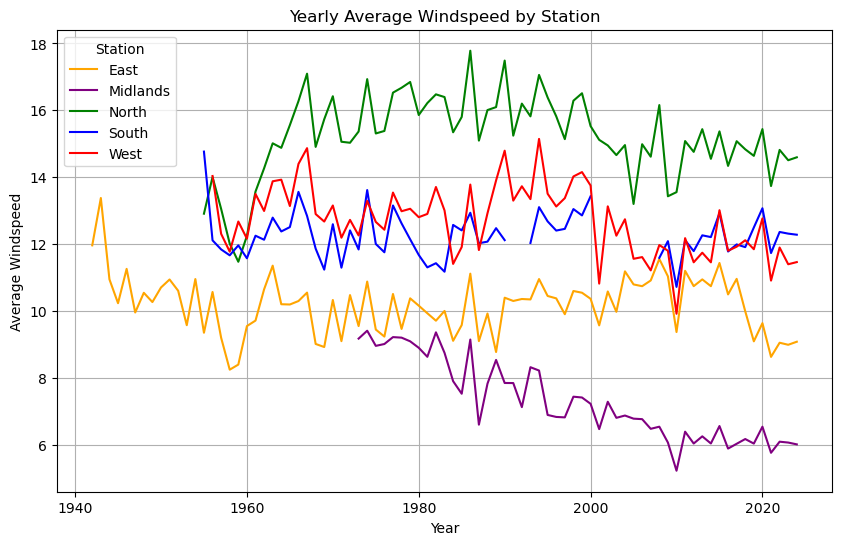

In [835]:
yearly_wdsp = ireland_df.groupby([ireland_df["date"].dt.year, "Station"])["wdsp"].mean().unstack()

plt.figure(figsize=(10,6))
yearly_wdsp.plot(ax= plt.gca(), color= station_colours)
plt.title("Yearly Average Windspeed by Station")
plt.xlabel("Year")
plt.ylabel("Average Windspeed")
plt.legend(title = "Station")
plt.grid()
plt.show()

Stations have different start dates with the East station (Dublin Airport) having the earliest. The Midlands station in Mullingar is the youngest and the South station closed for periods of time in the early 1990s and effectively from 2000 to 2008. I searched the Internet and contacted Met Éireann to enquire about these closures but have not received a response.

#### Seasonal Trends Over Time (by Station)

In [836]:
# Assigning seasons
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Adding the "season" indentifying column
ireland_df["season"] = ireland_df["date"].dt.month.apply(get_season)

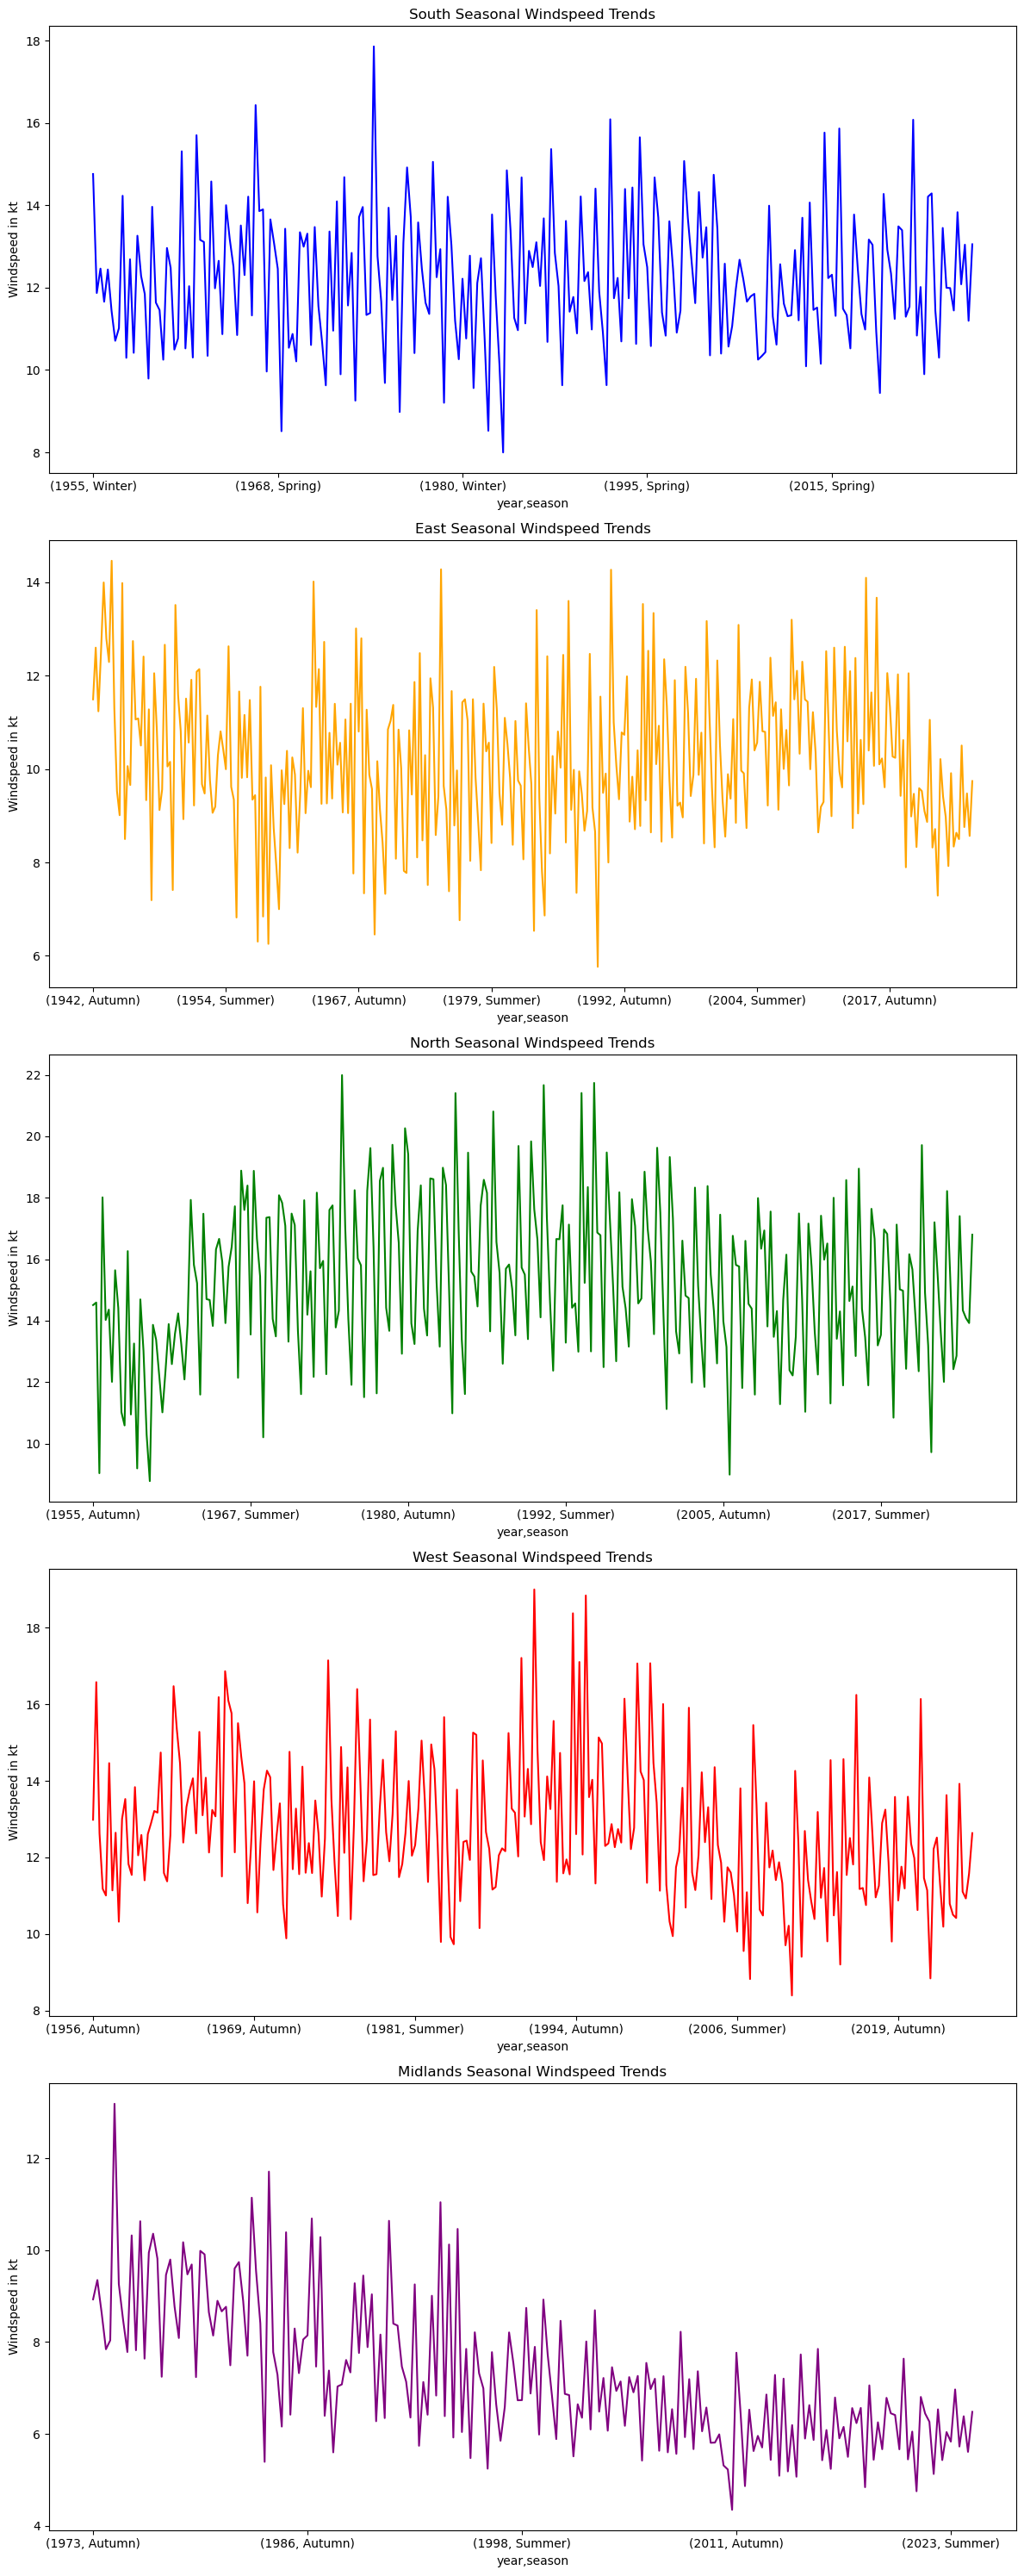

In [837]:
# groups season, year and station 
ireland_df["year"] = ireland_df["date"].dt.year
seasonal_trend_data = ireland_df.groupby(["Station", "year", "season"])["wdsp"].mean().unstack()
seasonal_trend_data = seasonal_trend_data.fillna(method="ffill").fillna(method="bfill")

stations = ireland_df["Station"].unique()
fig, axes = plt.subplots(len(stations), 1, figsize=(12, len(stations)*6))

for i, station in enumerate(stations):
    station_data = ireland_df[ireland_df["Station"] == station]
    station_data.groupby(["year", "season"])["wdsp"].mean().plot(ax=axes[i], color= station_colours.get(station))
    axes[i].set_title(f"{station} Seasonal Windspeed Trends")
    axes[i].set_ylabel("Windspeed in kt")

plt.tight_layout()
plt.show()

From these plots we can see for each station over time, there has been a minor decrease in average wind speeds, particularly in the Midlands.

### Measuring The Proportion of Windspeeds That Fall Into The Operating Range

According to the [Irish Wind Energy Association](http://www.iwea.ie/technicalfaqs#:~:text=Wind%20turbines%20typically%20start%20operating,or%2025%2D30%20mph) (IWEA) wind turbines typically operate within the windspeeds of **8-12** miles per hour(**mph**) and **54 mph**, after which point the wind turbines shut down to prevent damage. Turbines reach _maximum power_ at **25-30mph**. While looking at windspeeds it's important to identify the stations that sit within this ideal operating range. The windspeed in this combined dataframe is measured in knots (kt).

I will need to add a conversion column to my dataframe at the conversion rate of 1.15078 mph per 1 knot.

I will also need to filter each station data by the operating ranges. The starting operating range is marked as a range itself of between 8 and 12, so I will take the median and start at **10 mph**.

In [838]:
# Conversion
ireland_df["wdsp_mph"] = ireland_df["wdsp"] * 1.15078
ireland_df["hg_mph"] = ireland_df["hg"] * 1.15078

In [839]:
# Filtering the operating ranges
operating_range = (ireland_df["wdsp_mph"] >= 10) & (ireland_df["wdsp_mph"]<= 54)
max_power_range = (ireland_df["wdsp_mph"] >= 25) & (ireland_df["wdsp_mph"] <= 30)
damaging_winds = (ireland_df["hg_mph"] >= 55)

# Operating range and max power columns to identify which rows are in this range
ireland_df["in_operating_range"] = operating_range
ireland_df["in_max_power_range"] = max_power_range
ireland_df["in_damaging_winds"] = damaging_winds

# Grouping together the sum of each station and when it falls in the operating and max power range
range_stats = ireland_df.groupby("Station").agg(
    total_entries =("wdsp_mph", "count"),
    operating_count =("in_operating_range", "sum"),
    max_power_count =("in_max_power_range", "sum"),
    damaging_winds_count =("in_damaging_winds", "sum")
)

# Calculate percentages and create columns
range_stats["percent_in_operating_range"] =(range_stats["operating_count"] / range_stats["total_entries"]) * 100
range_stats["percent_in_max_power_range"] =(range_stats["max_power_count"] / range_stats["total_entries"]) * 100
range_stats["percent_in_damaging_winds"] =(range_stats["damaging_winds_count"] / range_stats["total_entries"] * 100)


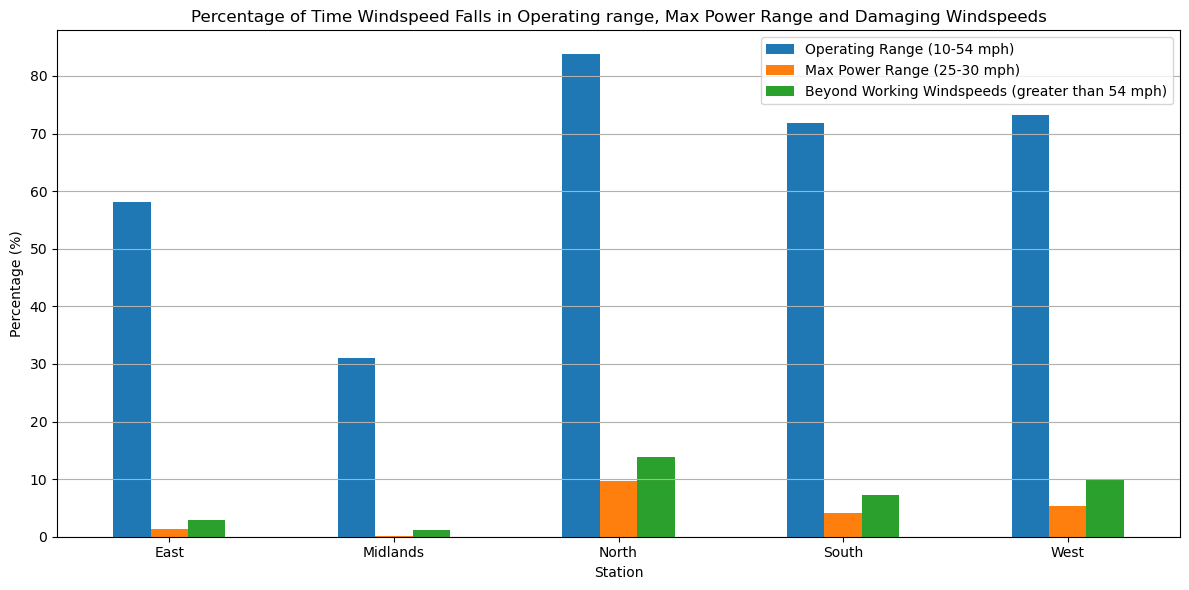

In [840]:
# Bar chart to illustrate percentage of stations in ranges

range_stats[["percent_in_operating_range", "percent_in_max_power_range", "percent_in_damaging_winds"]].plot(
    kind="bar",
    figsize=(12, 6)
)

plt.title("Percentage of Time Windspeed Falls in Operating range, Max Power Range and Damaging Windspeeds")
plt.ylabel("Percentage (%)")
plt.xlabel("Station")
plt.xticks(rotation=0)
plt.legend(["Operating Range (10-54 mph)", "Max Power Range (25-30 mph)", "Beyond Working Windspeeds (greater than 54 mph)"], loc="upper right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

From the table above, we can see that the most effective locations for developing a wind farm are the North, South and West stations as they are in the operating ranges more than 70% of the time. The station with the most wind activity is the station at Malin Head in the North but they also receive strong gusts above 12% of the time, which are potentially damaging, if gusts tend to happen unpredictably.

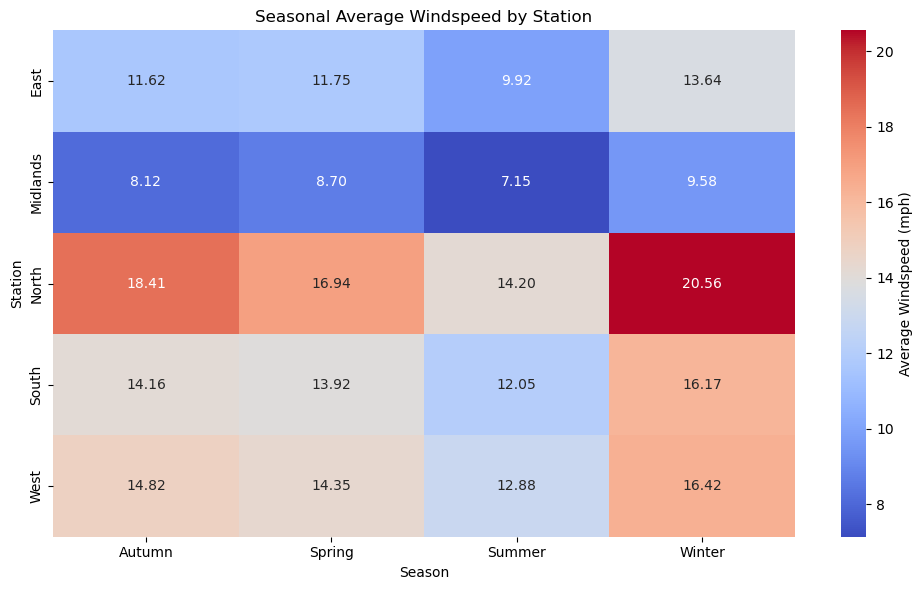

In [841]:
# Using a heatmap to show seasonal averages for windspeed in mph
seasonal_mean_mph = ireland_df.groupby(["Station", "season"])["wdsp_mph"].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_mean_mph, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Average Windspeed (mph)"})
plt.title("Seasonal Average Windspeed by Station")
plt.ylabel("Station")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

From the heatmap above, we can see that the North Station (Malin Head) appears to be well within the operating range in all seasons. Followed by the West (Belmullet) and the South (Roches Point). The Midlands (Mullingar) or the East (Dublin Airport) would not be effective locations for a wind farm, referencing the bar chart above, they also rarely meet the wind range for maximum power, if ever.

### Predicting Future Wind Speeds

Doing a linear regression of yearly windspeeds.

In [842]:
# Create 'year' column
ireland_df["year"] = ireland_df["date"].dt.year

# Calculate the annual mean wind speed for each station
annual_mean_wdsp = ireland_df.groupby(["Station", "year"])["wdsp_mph"].mean().reset_index()

In [843]:
# Center the year column by subtracting the minimum year
annual_mean_wdsp["year_centered"] = annual_mean_wdsp["year"] - annual_mean_wdsp["year"].min()

# Container for regression results
regression_results = {}

# Loop through each station
for station in annual_mean_wdsp["Station"].unique():
    station_data = annual_mean_wdsp[annual_mean_wdsp["Station"] == station]
    
    # Prepare data for regression (reshape for scikit-learn)
    X = station_data["year_centered"].values.reshape(-1, 1)  # Predictor: year
    y = station_data["wdsp_mph"].values  # Response: mean wind speed
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Save results
    regression_results[station] = {
        "model": model,
        "slope": model.coef_[0],
        "intercept": model.intercept_,
        "r_squared": model.score(X, y)
    }
    
    # Print regression summary
    print(f"Station: {station}")
    print(f"  Slope (change per year): {model.coef_[0]:.3f}")
    print(f"  Intercept: {model.intercept_:.3f}")
    print(f"  R-squared: {model.score(X, y):.3f}")
    print("-" * 30)


Station: East
  Slope (change per year): -0.004
  Intercept: 11.879
  R-squared: 0.009
------------------------------
Station: Midlands
  Slope (change per year): -0.082
  Intercept: 13.073
  R-squared: 0.828
------------------------------
Station: North
  Slope (change per year): 0.005
  Intercept: 17.265
  R-squared: 0.004
------------------------------
Station: South
  Slope (change per year): -0.004
  Intercept: 14.265
  R-squared: 0.010
------------------------------
Station: West
  Slope (change per year): -0.027
  Intercept: 15.926
  R-squared: 0.207
------------------------------


These statistics confirm what we could see above, the stations are likely to experience a continued decrease in windspeed. However, there is one exception, being the North station at Malin Head. Changes in windspeeds are very slight with more moderate changes observed at the West station in Belmullet.

Unfortunately the R-squared for all but 2 stations are not meaningful and therefore cannot be taken into account. The West station has some evidence for a trend but again it's not very strong. The strongest evidence can be seen in the Midlands station.

#### Rolling Windspeeds Over a Decade

Getting the rolling average over a 10 year period will reduce the noise in the dataframe and hopefully allow us to see what the next 10 years may look like.

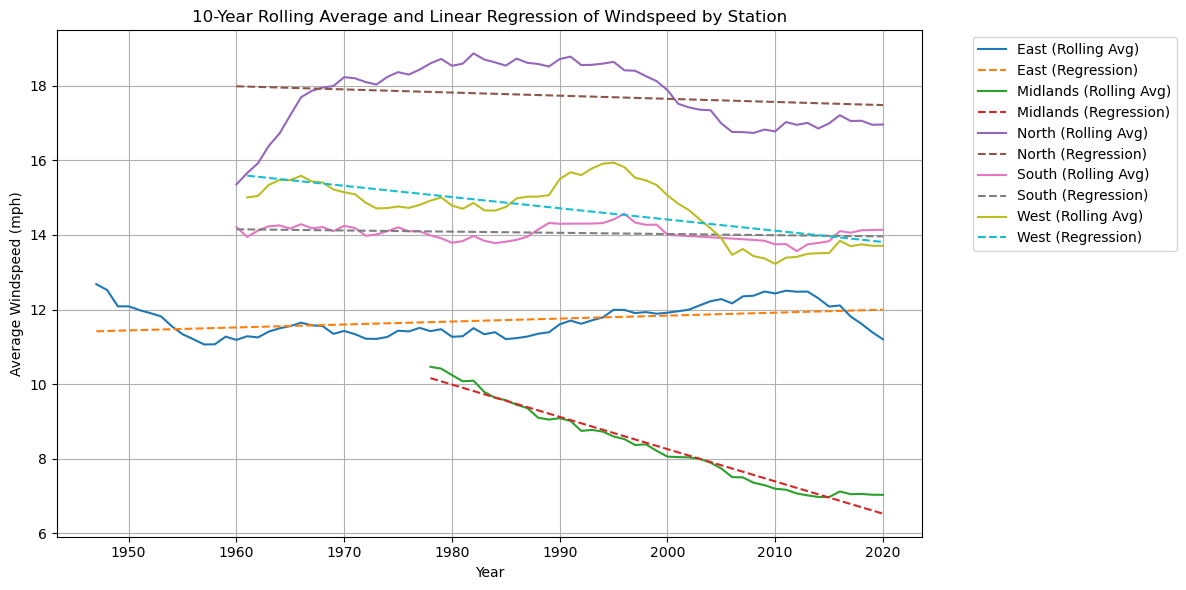

Station: East
  Slope (change per year): 0.008
  Intercept: 11.377
  R-squared: 0.157
------------------------------
Station: Midlands
  Slope (change per year): -0.087
  Intercept: 13.276
  R-squared: 0.969
------------------------------
Station: North
  Slope (change per year): -0.008
  Intercept: 18.132
  R-squared: 0.029
------------------------------
Station: South
  Slope (change per year): -0.003
  Intercept: 14.207
  R-squared: 0.077
------------------------------
Station: West
  Slope (change per year): -0.030
  Intercept: 16.157
  R-squared: 0.452
------------------------------


In [858]:
# Center the year
annual_mean_wdsp["year_centered"] = annual_mean_wdsp["year"] - annual_mean_wdsp["year"].min()

# Set the window size (e.g., 10 years)
window_size = 10

# Prepare for linear regression on rolling averages
regression_results = {}

# Create figure for plotting
plt.figure(figsize=(12, 6))

# Loop through each station and perform rolling mean and regression
for station in annual_mean_wdsp["Station"].unique():
    station_data = annual_mean_wdsp[annual_mean_wdsp["Station"] == station]
    
    # Apply rolling mean for the station data
    rolling_mean = station_data["wdsp_mph"].rolling(window=window_size, center=True).mean()
    
    # Remove NaN values resulting from the rolling mean
    valid_data = station_data[~rolling_mean.isna()]
    X = valid_data["year_centered"].values.reshape(-1, 1)  # Use centered year
    y = rolling_mean.dropna().values

    # Perform linear regression on rolling average
    model = LinearRegression()
    model.fit(X, y)
    
    # Save regression results
    regression_results[station] = {
        "model": model,
        "slope": model.coef_[0],
        "intercept": model.intercept_,
        "r_squared": model.score(X, y),
    }
    
    # Plot the rolling mean and regression line for each station
    plt.plot(station_data["year"], rolling_mean, label=f"{station} (Rolling Avg)")
    plt.plot(valid_data["year"], model.predict(X), label=f"{station} (Regression)", linestyle="--")

plt.title(f"{window_size}-Year Rolling Average and Linear Regression of Windspeed by Station")
plt.xlabel("Year")
plt.ylabel("Average Windspeed (mph)")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print regression summaries 
for station, results in regression_results.items():
    print(f"Station: {station}")
    print(f"  Slope (change per year): {results['slope']:.3f}")
    print(f"  Intercept: {results['intercept']:.3f}")
    print(f"  R-squared: {results['r_squared']:.3f}")
    print("-" * 30)


The R-squared has increased for each station, however, apart from the Midlands and West stations, the evidence remains slight or non-existant. Therefore attempting to predict the windspeed for the next ten years, based on the slope results of the _linear regression_, would not be accurate.

## References
https://www.statology.org/pandas-drop-columns-not-in-list/

https://www.youtube.com/watch?v=wzN1UyfRSWI

http://www.iwea.ie/technicalfaqs#:~:text=Wind%20turbines%20typically%20start%20operating,or%2025%2D30%20mph